In [32]:
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [6]:
df.isnull().value_counts()

uid    asin   title  stars  reviews  price  isBestSeller  boughtInLastMonth  category
False  False  False  False  False    False  False         False              False       2443651
Name: count, dtype: int64

 **Frequency Tables**:

    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [3]:
frec=df["category"].value_counts()
frec
#1) sports, 2) beauty, 3) Handmade clothing, 4) Bath body, 5)Birthday gifts

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


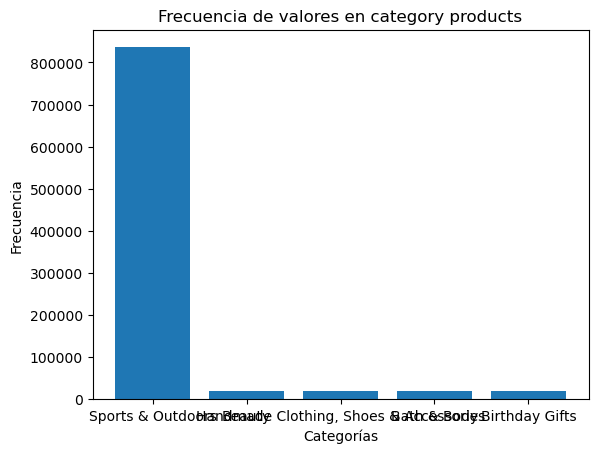

In [8]:

# Crear un gráfico de barras
plt.bar(frec[:5].index, frec[:5].values)

# Agregar título y etiquetas
plt.title('Frecuencia de valores en category products')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [ ]:
def m_m_m(df,columna):

    moda=df[columna].mode().iloc[0] # Tomamos solo el primer valor de la moda si hay varios
    media=df[columna].mean()
    mediana=df[columna].median()
    varianza=df[columna].var()
    desest=df[columna].std()
    rango = df[columna].max() - df[columna].min()
    rango_i = df[columna].quantile(0.75) - df[columna].quantile(0.25)
    
    print(f"media: {media} \n mediana: {mediana} \n moda: {moda}\n varianza: {varianza}\n desviación estandar: {desest}\n rango:{rango}\n rango intercuartil: {rango_i}")

m_m_m(df,"price")

#La diferencia entree moda y media es de 80 libras. Por lo tanto, el promedio de los precios difiere mucho el precio más común

media: 89.24380943923663 
 mediana: 19.09 
 moda: 9.99
 varianza: 119445.48532254907
 desviación estandar: 345.60886175349884
 rango:100000.0
 rango intercuartil: 36.0


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

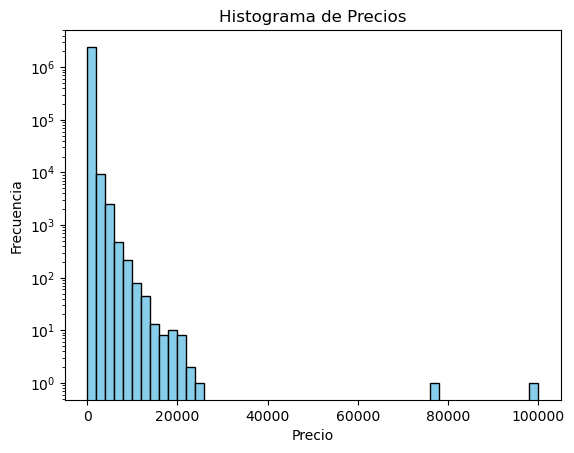

In [31]:
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.yscale('log')  # Cambiar la escala del eje Y a logarítmica
# Agregar título y etiquetas a los ejes
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

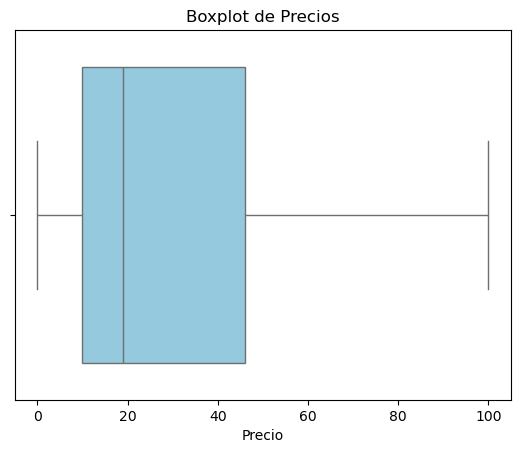

In [41]:
# Crear el boxplot con seaborn
sb.boxplot(x=df['price'], color='skyblue',showfliers=False)

# Agregar título y etiquetas a los ejes
plt.title('Boxplot de Precios')
plt.xlabel('Precio')

# Mostrar el gráfico
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [45]:
df_stars=df.loc[df['stars'] !=0]

In [46]:
m_m_m(df_stars,"stars")

media: 4.31916076222691 
 mediana: 4.4 
 moda: 4.5
 varianza: 0.30834337523872835
 desviación estandar: 0.5552867504620729
 rango:4.0
 rango intercuartil: 0.5


In [49]:
skewness = df_stars['stars'].skew()
kurtosis = df_stars['stars'].kurt()
print(f"Asimetría: {skewness} \n curtosis: {kurtosis}")

Asimetría: -2.3795681122127945 
 curtosis: 9.78193769066435


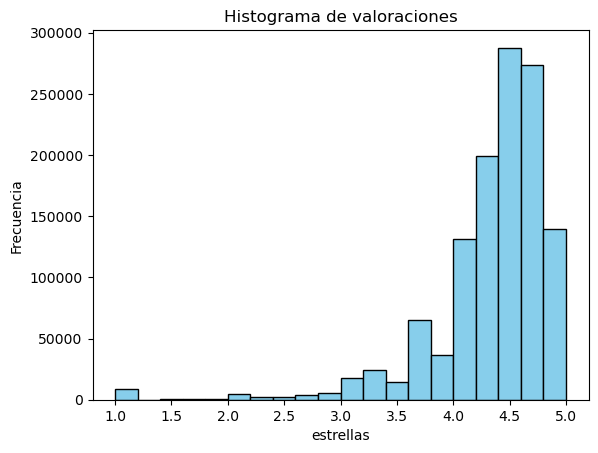

In [52]:
plt.hist(df_stars['stars'], bins=20, color='skyblue', edgecolor='black')
# Agregar título y etiquetas a los ejes
plt.title('Histograma de valoraciones')
plt.xlabel('estrellas')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()